## BIG MART SALES DATA PREDICTION

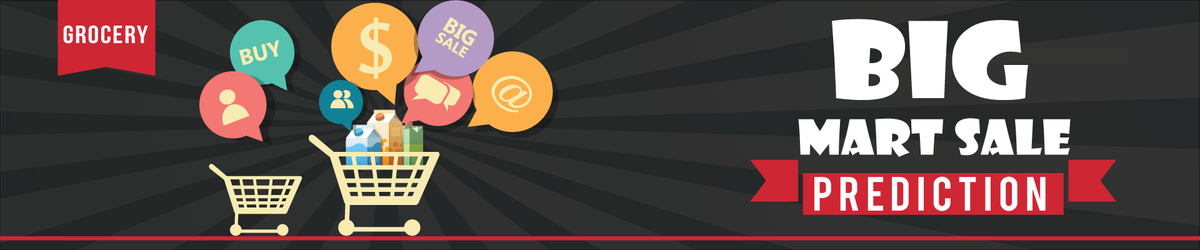

## Problem Statement:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales

## Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## 1 Reading the Data

In [11]:
df_train=pd.read_csv("train_big.csv")

In [12]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test_data=pd.read_csv("test_big.csv")

In [6]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [13]:
df_train.shape

(8523, 12)

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [15]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [16]:
categorical_df = df_train.select_dtypes(include = 'object')
numerical_df = df_train.select_dtypes(exclude = 'object')

In [18]:
print(f"There are {len(categorical_df.columns)} Categorical Attributes")
print(f"There are {len(numerical_df.columns)} Numerical Attributes")

There are 7 Categorical Attributes
There are 5 Numerical Attributes


  ## 2. Exploratory Data Analysis¶
Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

We will be improve our features as we go through the visulizations.

But first, let's analyze the missing values

In [19]:
xdf = df_train.copy()

## Missing Values¶


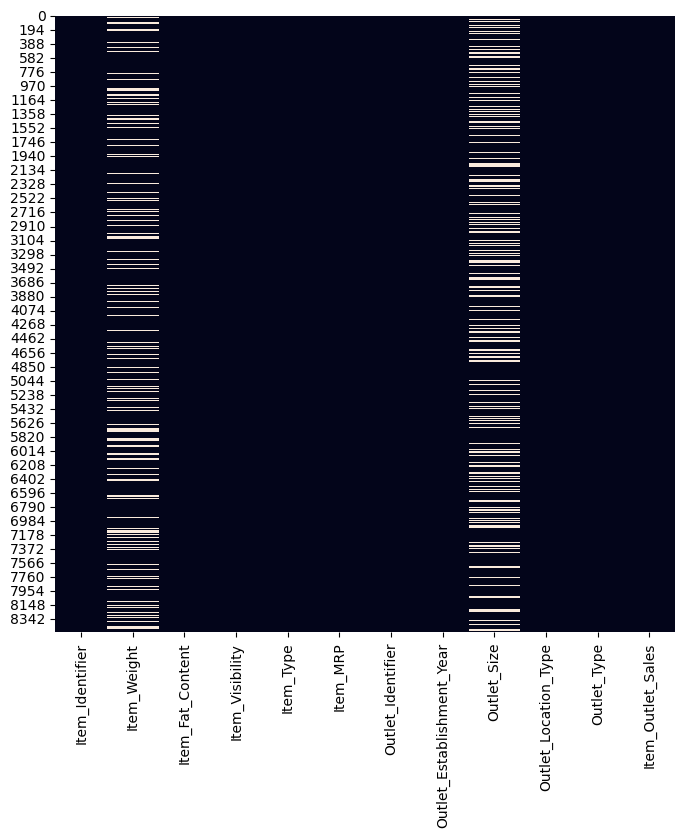

In [21]:
plt.figure(figsize = (8,8))
sns.heatmap(xdf.isnull(), cbar = False);

Now, we know Item_Weight and Outlet_Size contains huge number of "NaN" but how much?

In [22]:
## Let's list them out:

total = xdf.isnull().sum().sort_values(ascending = False)
percent = ((xdf.isnull().sum() / xdf.shape[0]) * 100).sort_values(ascending = False)
percent = np.round(percent, 3)
types = xdf[percent.index].dtypes

missing_data = pd.concat([total, percent, types], axis = 1, keys = ["Total","Percent","Type"])
missing_data.head(5)


,Total,Percent,Type
Outlet_Size,2410,28.276,object
Item_Weight,1463,17.165,float64
Item_Identifier,0,0.000,object
Item_Fat_Content,0,0.000,object
Item_Visibility,0,0.000,float64


These are the values in % . 28.27% and 17.16 % values are missing in Outlet_Size and Item_Weight respectively

# ## Outlet_Size
Since this is a categorical attribute we will impute by using mode

In [23]:
xdf['Outlet_Size'].fillna(xdf['Outlet_Size'].mode()[0], inplace = True)

Item_Weight
It is a numeric variable, so we will be replacing it by median

In [24]:
xdf['Item_Weight'].fillna(xdf['Item_Weight'].median(), inplace = True)

Let's confirm the impute

In [25]:
xdf.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Univariate Analysis¶
Starting with the analyzation of Target Attribute



In [26]:
xdf['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

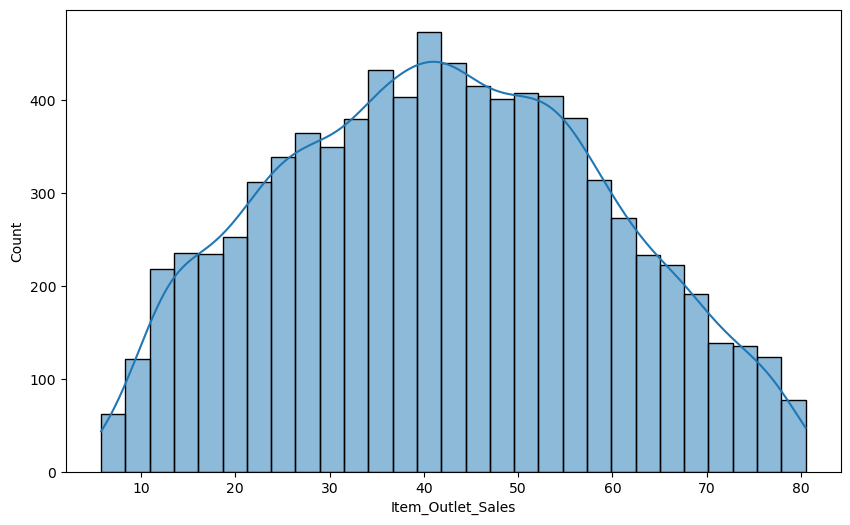

In [40]:
plt.figure(figsize = (10,6))
sns.histplot(data = xdf, x = 'Item_Outlet_Sales', kde = True);
plt.show()

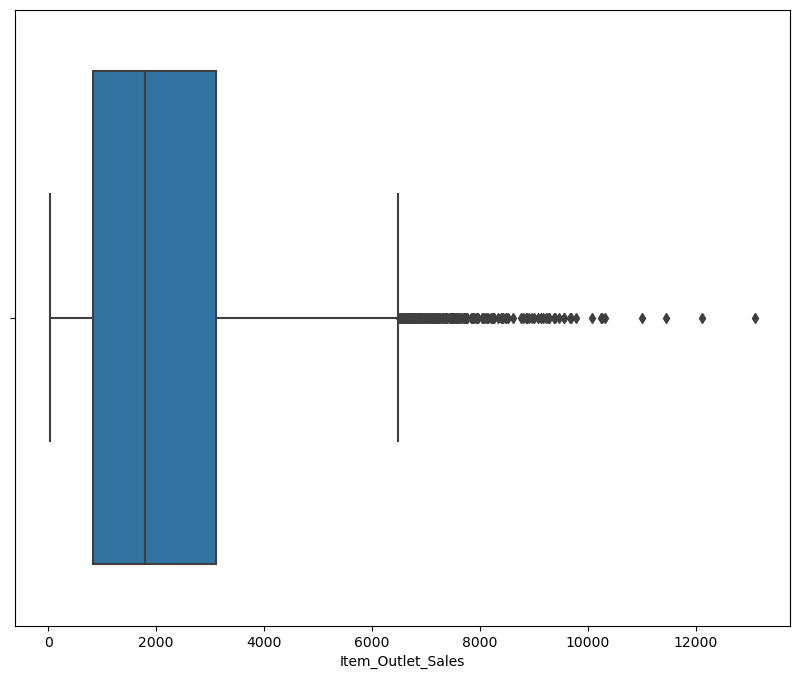

In [29]:
## let's confirm the outliers

plt.figure(figsize = (10,8))
sns.boxplot( x = 'Item_Outlet_Sales', data = xdf);

In [30]:
## First we will remove the outliers from this attribute
## function to remove outlier

def remove_outliers(dataframe, column):
    
    Q3 = dataframe[column].quantile(0.75)
    Q1 = dataframe[column].quantile(0.25)
    
    IQR = Q3 - Q1
    
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    
    df_no_outlier = dataframe[(dataframe[column] > lower ) & (dataframe[column] < upper)]

    return df_no_outlier

In [31]:
# Removing Outliers form Item_Outlet_Sales

xdf = remove_outliers(xdf, "Item_Outlet_Sales")

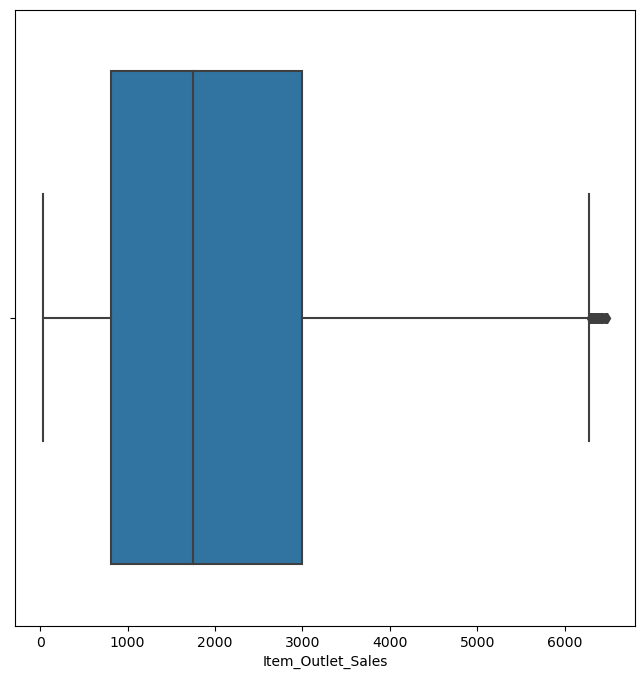

In [32]:
# Quickly checking the result in boxplot

plt.figure(figsize = (8,8))
sns.boxplot(x = 'Item_Outlet_Sales', data = xdf);

In [33]:
## Function for fixing positive skewness
def sqrt_transformation(dataframe):
    return np.sqrt(dataframe)

In [34]:
xdf['Item_Outlet_Sales'] = xdf['Item_Outlet_Sales'].map(sqrt_transformation)

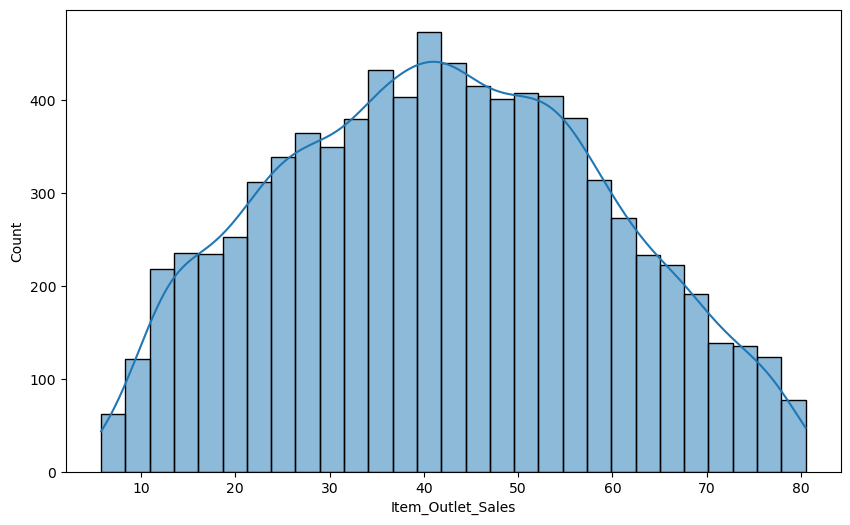

In [41]:
# After fixing skewness

plt.figure(figsize = (10,6))
sns.histplot(data = xdf, x = 'Item_Outlet_Sales', kde = True);

## Univariate Analysis (Independent Variables)

In [36]:
xxdf = xdf.copy()

In [37]:
numerical_df.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

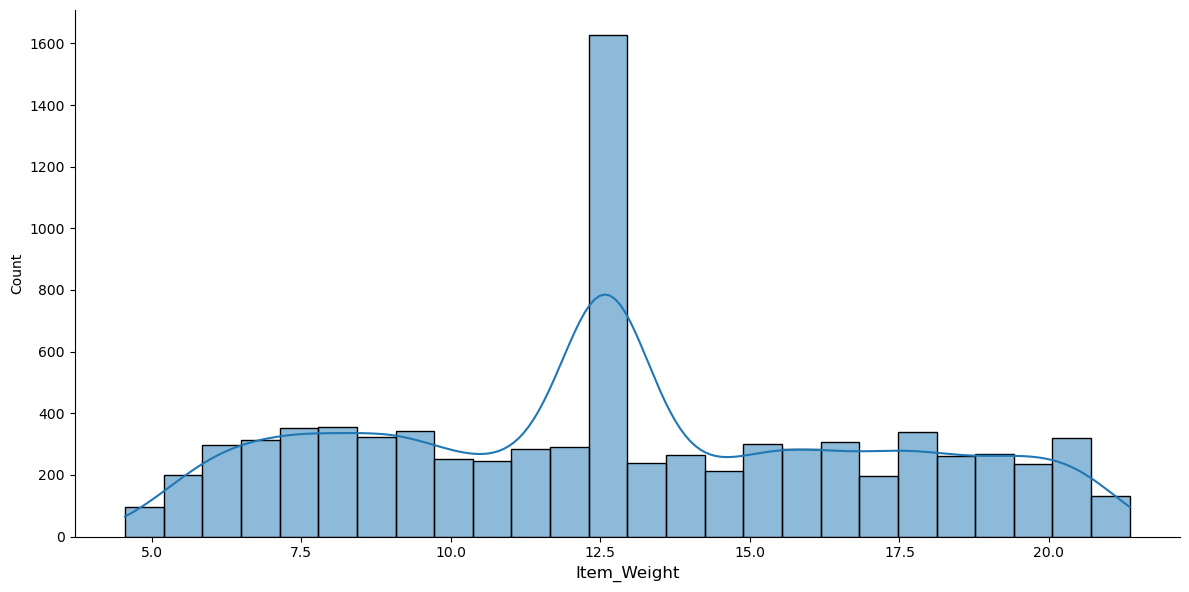

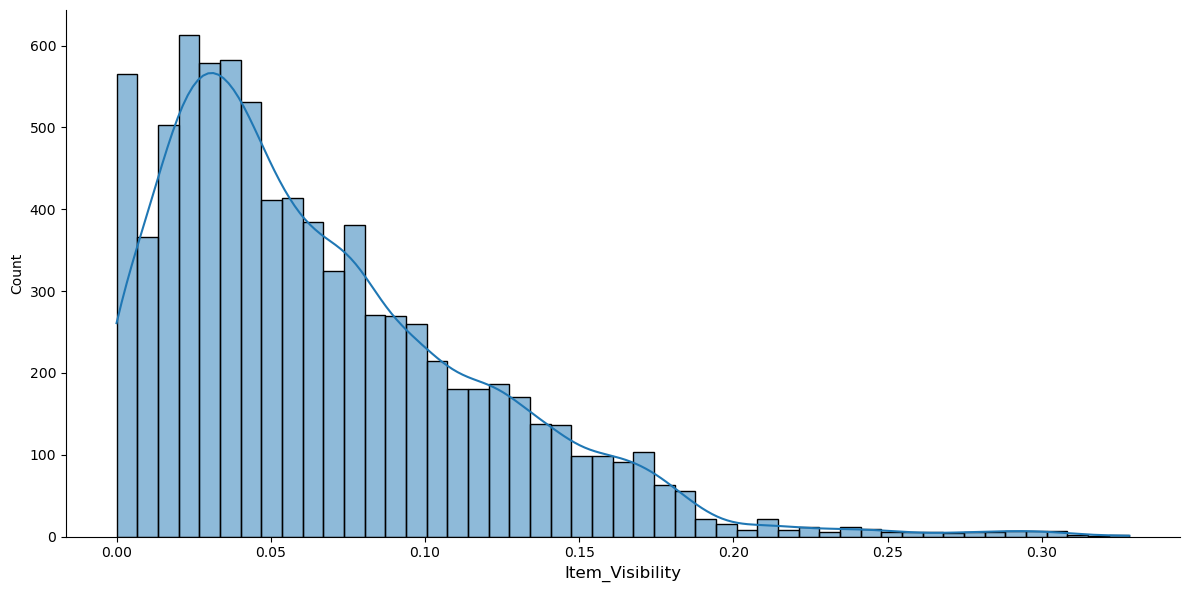

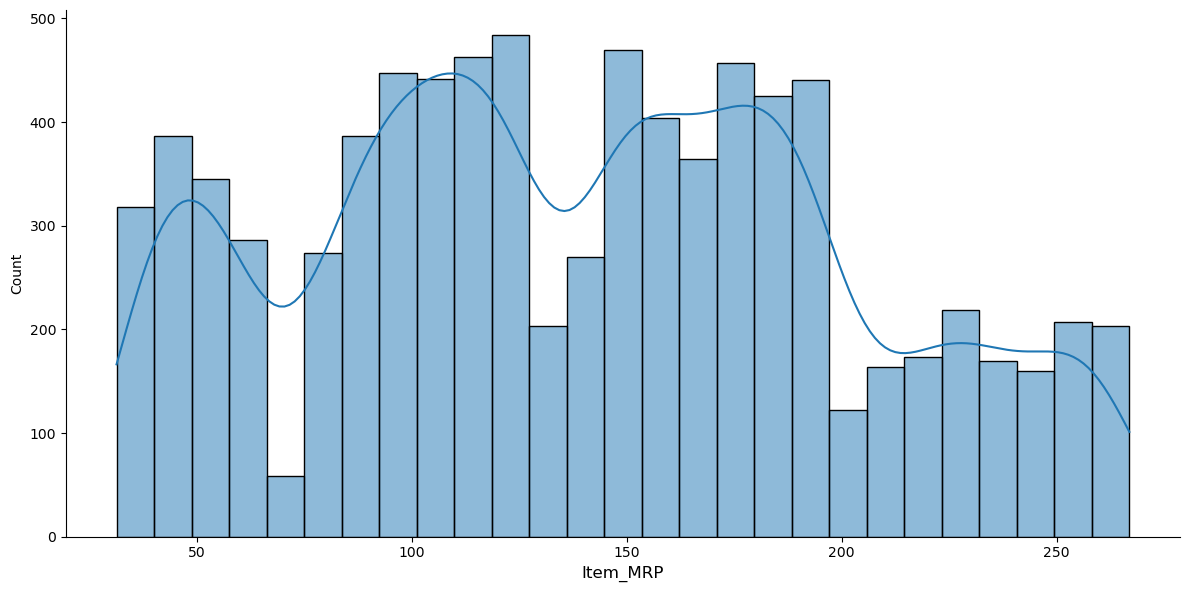

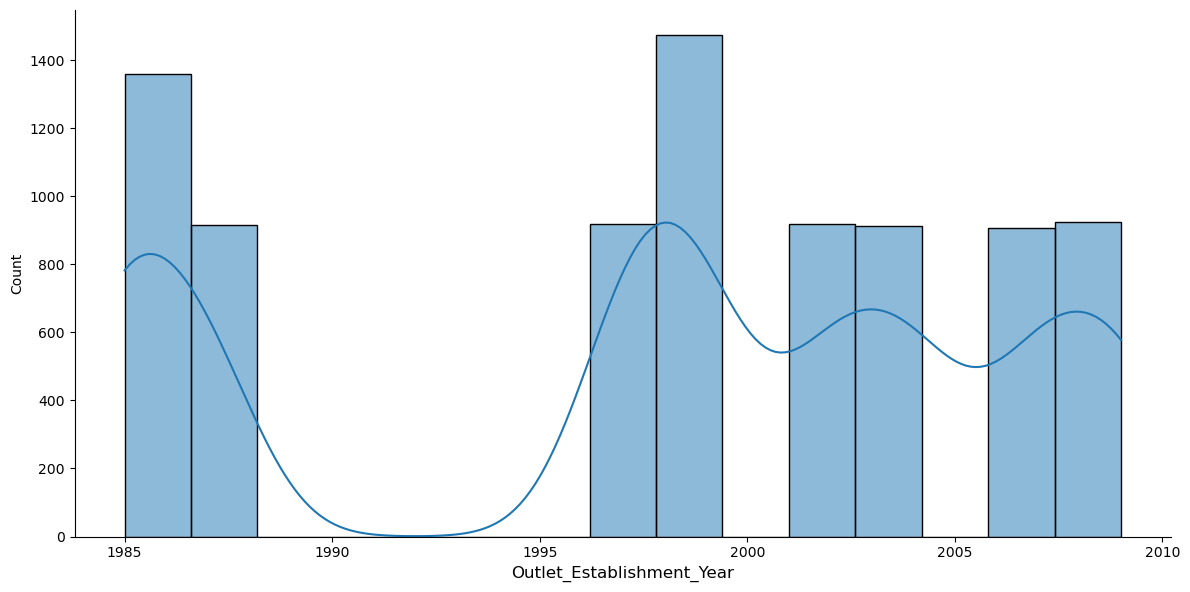

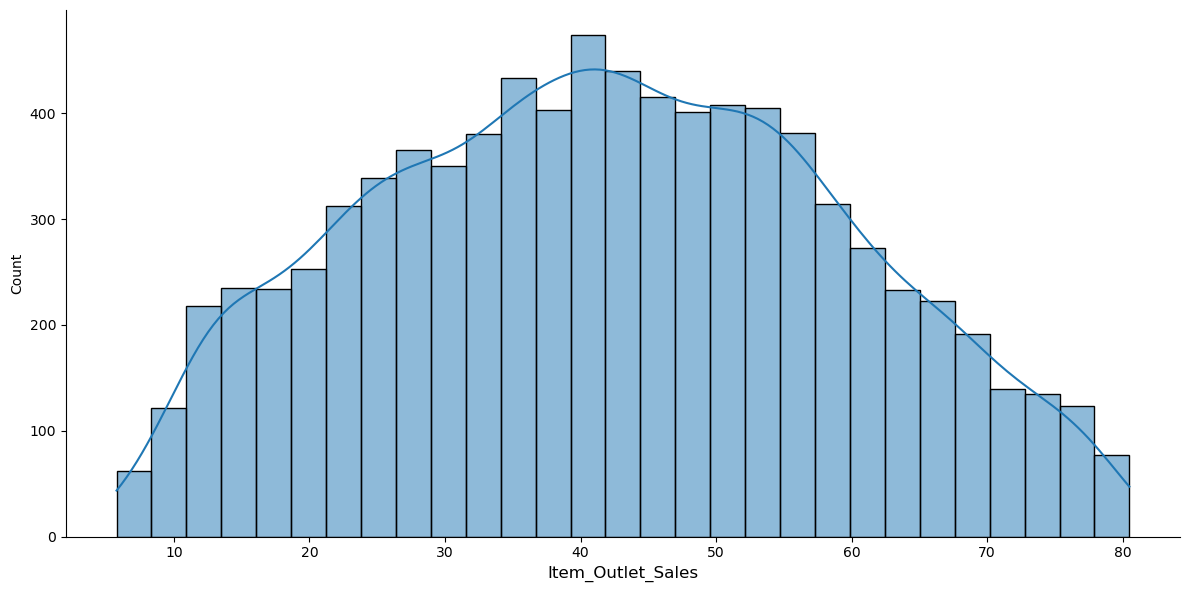

In [42]:
for i in numerical_df:
    sns.displot(data = xxdf, x = i, kde = True, aspect = 2, height = 6);
    plt.xlabel(i, fontsize = 12)

Let's take a note, which feature has skewed dataset.

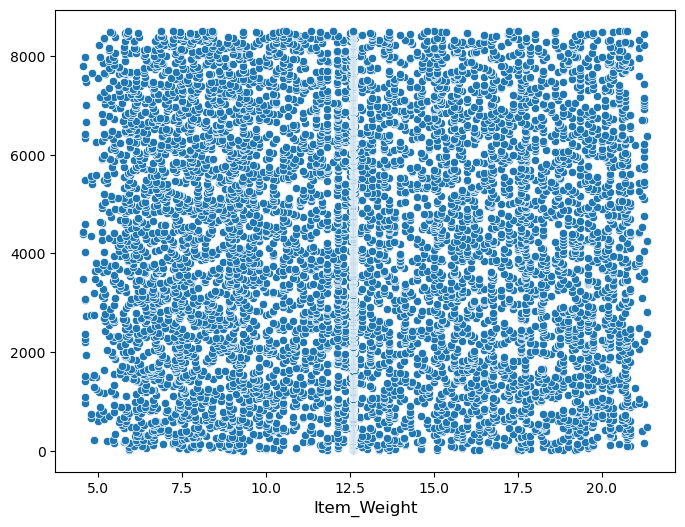

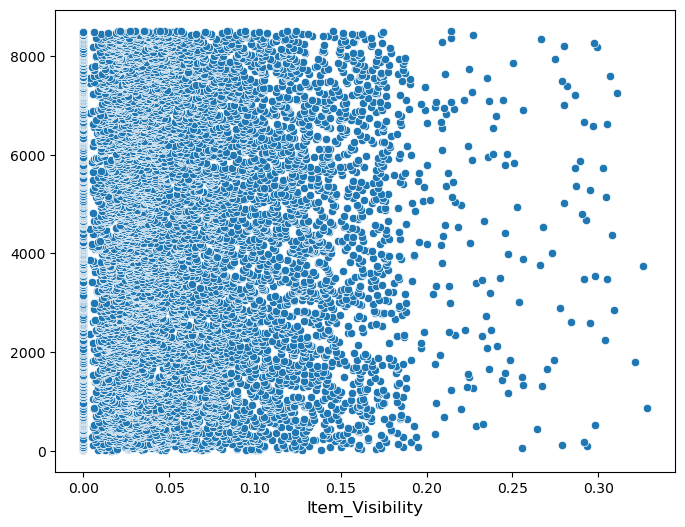

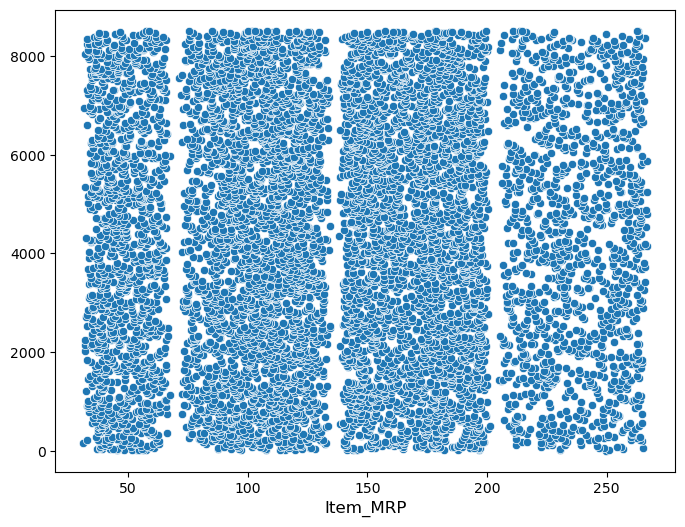

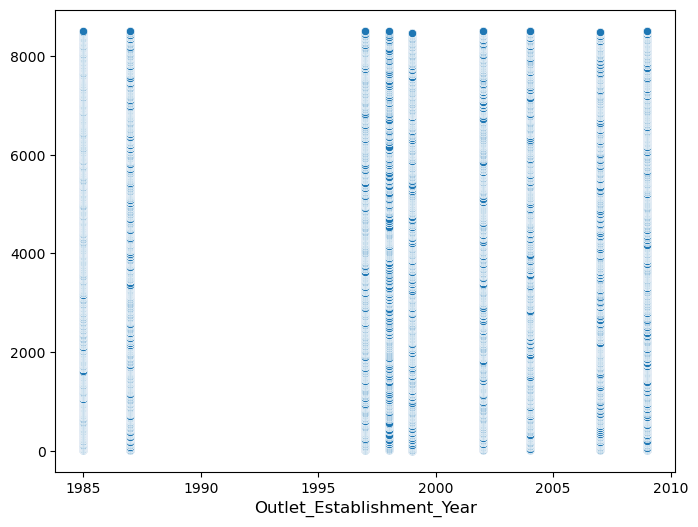

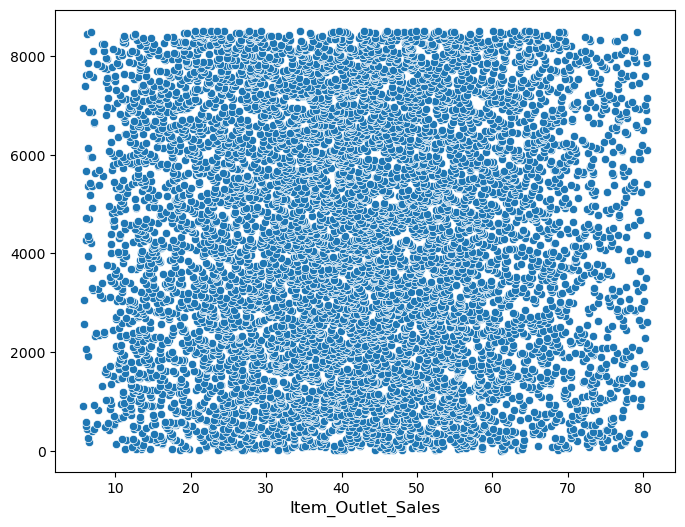

In [43]:
# Checking for outliers

for i in numerical_df:
    plt.figure(figsize =(8,6))
    sns.scatterplot(data = xxdf, y = xdf.index, x = i);
    plt.xlabel(i, fontsize = 12)

Also, let's take a note which Attribute contains outliers.

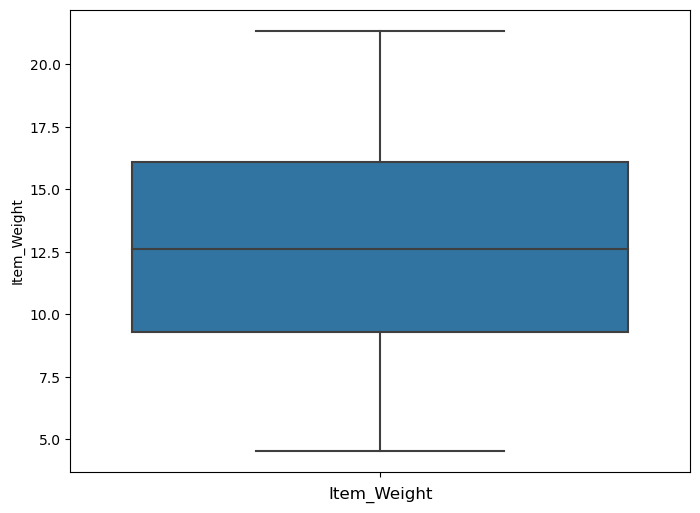

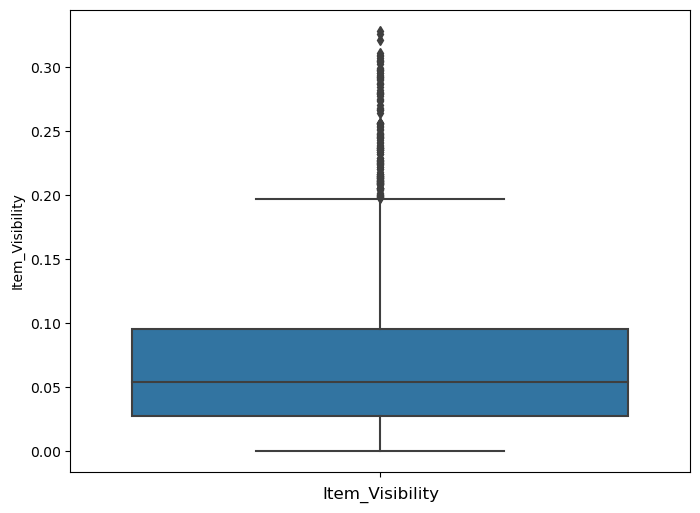

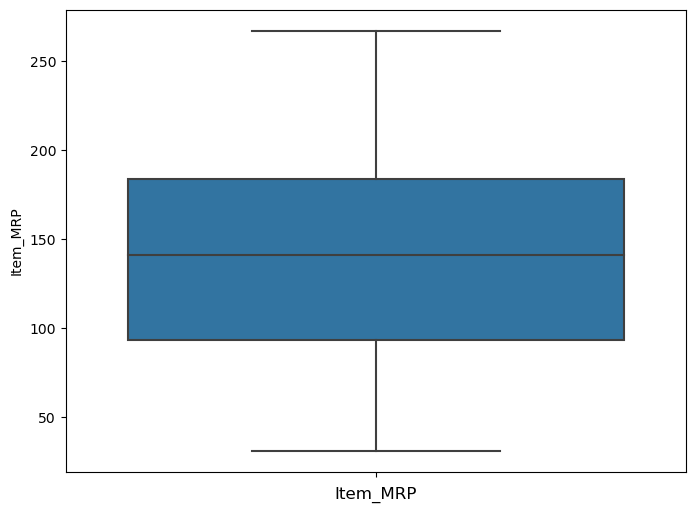

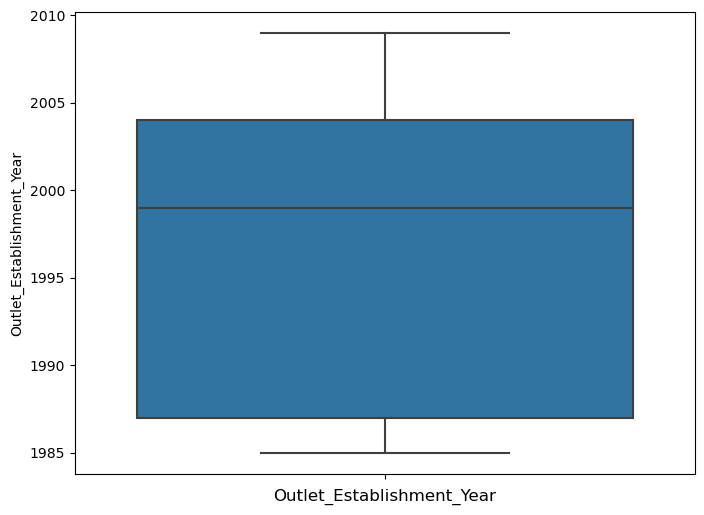

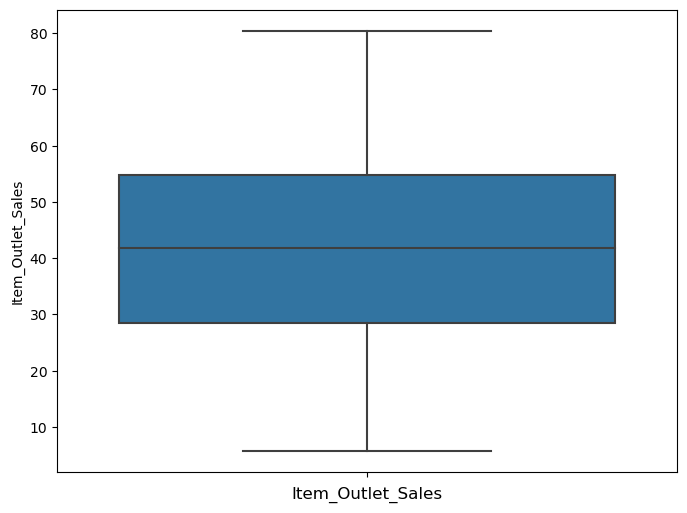

In [44]:
# Confirming the outliers

for i in numerical_df:
    plt.figure(figsize =(8,6))
    sns.boxplot(data = xxdf, y = i);
    plt.xlabel(i, fontsize = 12)

Observations:

Item_Visibility contains outliers, and as well as it is positively skewed on both the dastaset. Let's fix this.



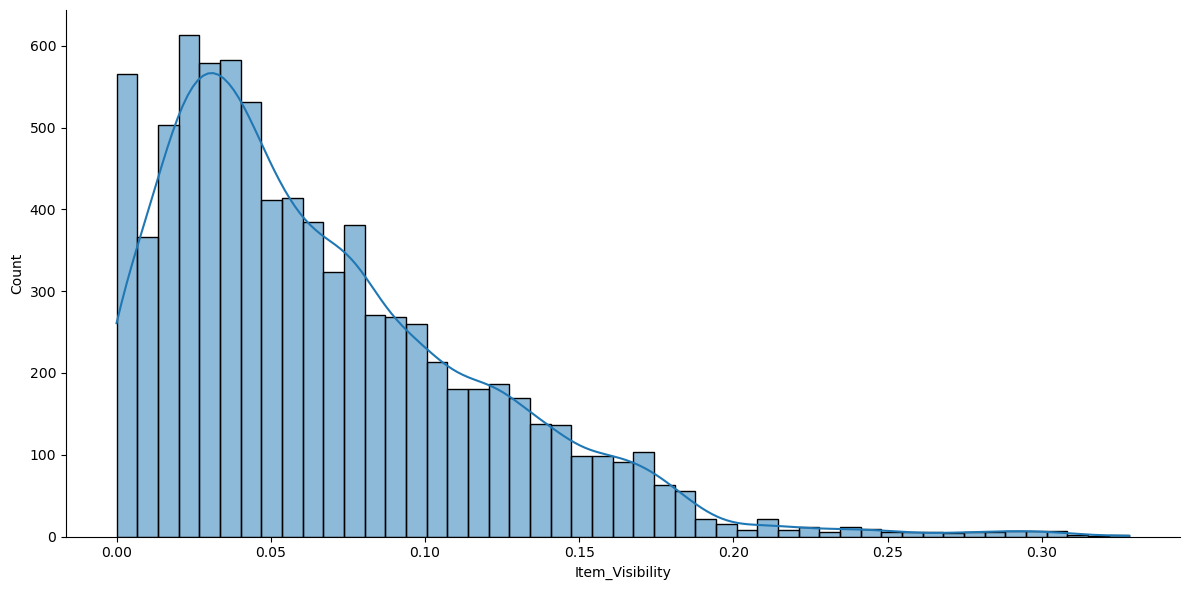

In [45]:
sns.displot(data = xxdf, x = 'Item_Visibility', kde = True, aspect = 2, height = 6);

It contains a 0 value, let's fix that too.

In [46]:
## First Removing strange '0'

xxdf['Item_Visibility'].replace(0, xxdf['Item_Visibility'].median(), inplace = True)

In [47]:
# Treating Postive skewness

xxdf['Item_Visibility'] = xxdf["Item_Visibility"].map(sqrt_transformation)


In [48]:
# Removing Outliers

xxdf = remove_outliers(xxdf, "Item_Visibility")

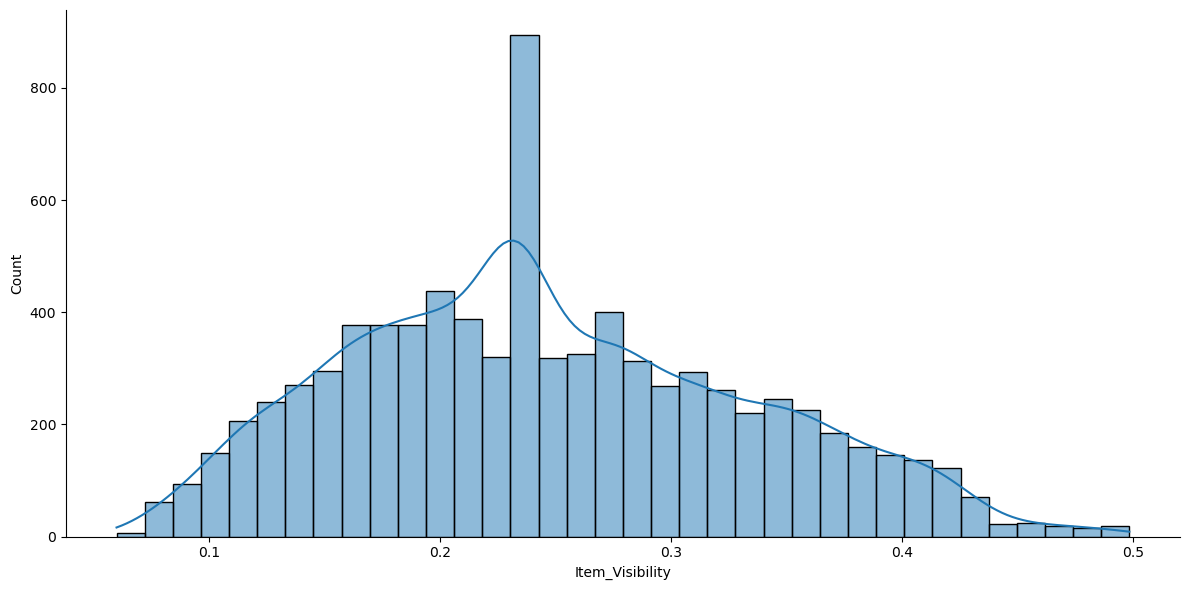

In [49]:
# After remvoing skewness and fixing outliers on trainset

sns.displot(x = 'Item_Visibility', data = xxdf, aspect = 2, height = 6, kde = True);

## Bivariate Analysis¶


First let's see the scatter plot of all the Numerical variables in term of Item_Outlet_Sales



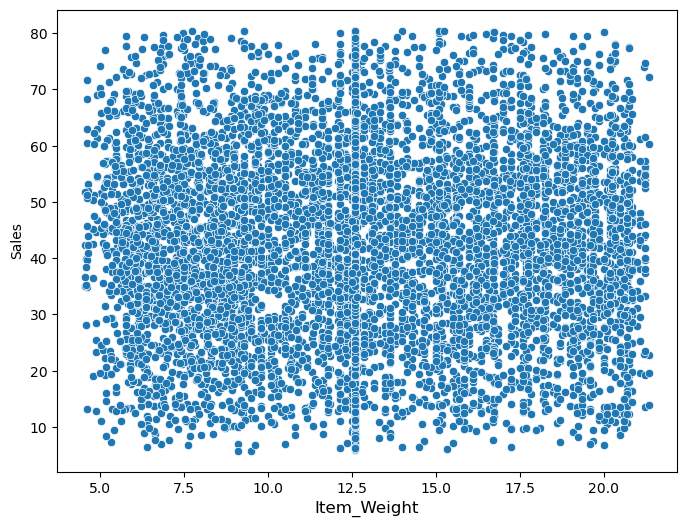

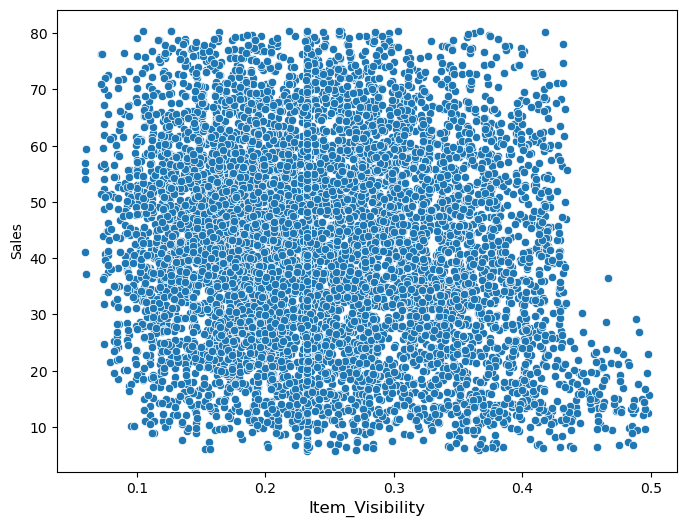

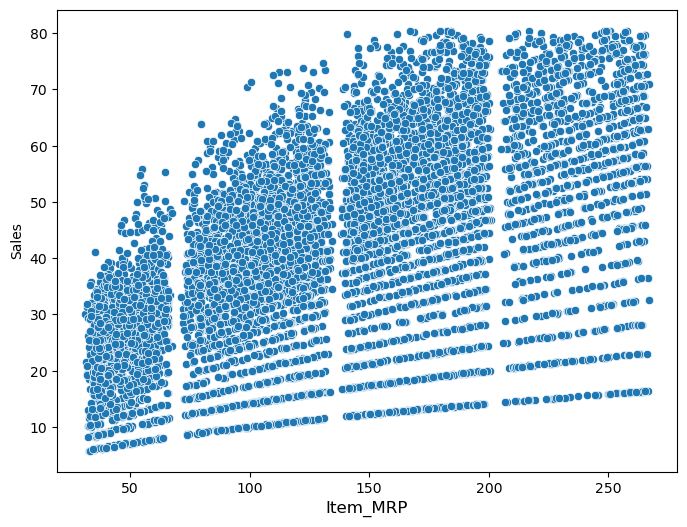

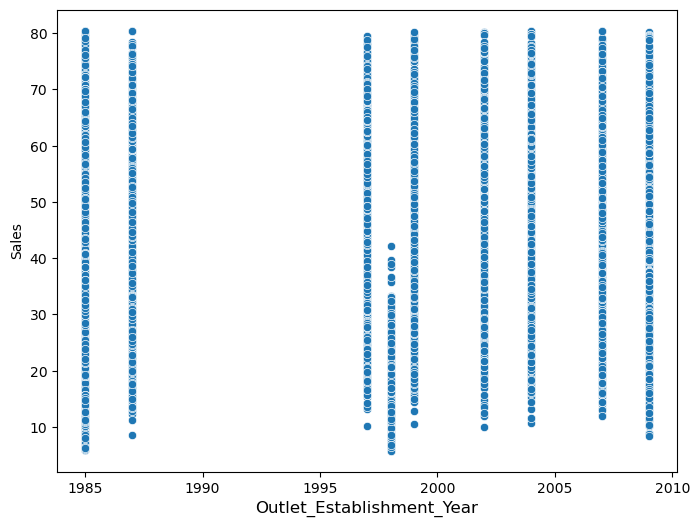

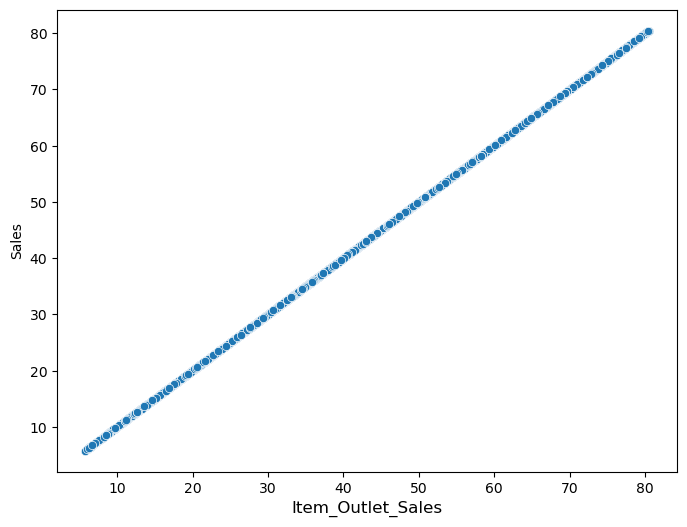

In [50]:
for i in numerical_df:
    plt.figure(figsize =(8,6))
    sns.scatterplot(data = xxdf, x = i, y = xxdf['Item_Outlet_Sales']);
    plt.xlabel(i, fontsize = 12)
    plt.ylabel("Sales")


We observe, Item_MRP has linear relationship



In [51]:
bi_df = xxdf.copy()

In [52]:
categorical_df.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

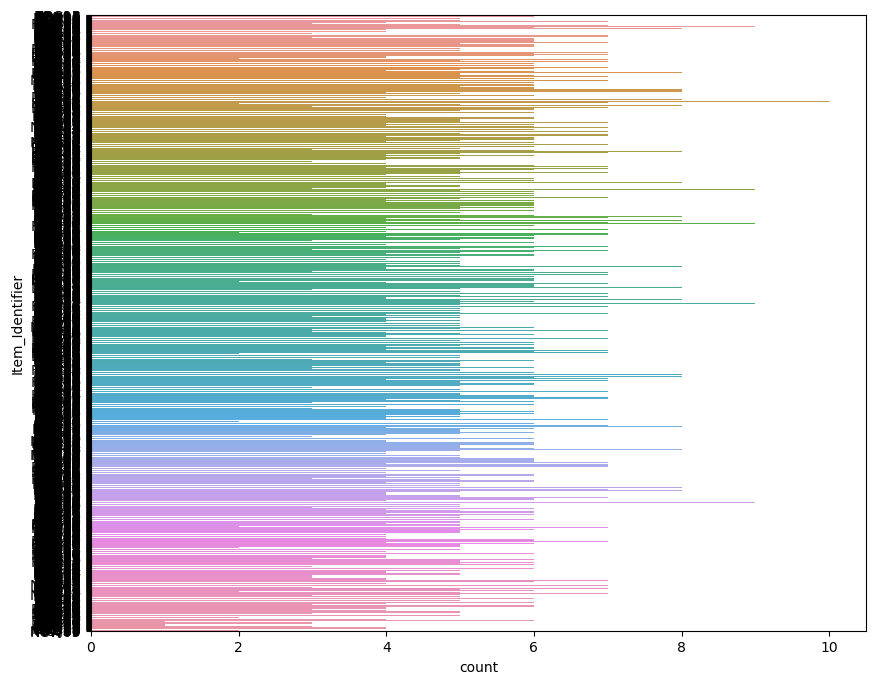

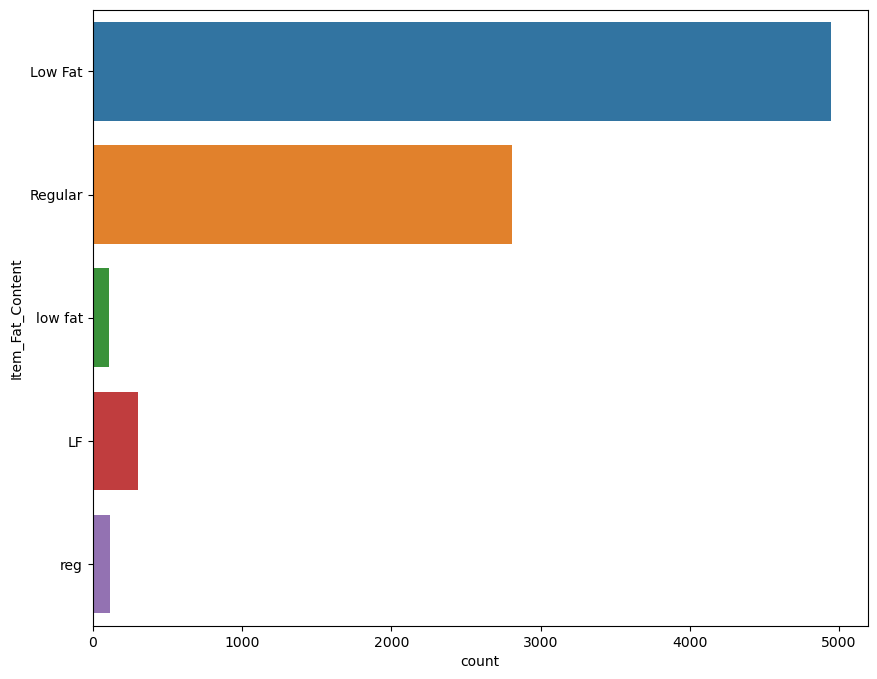

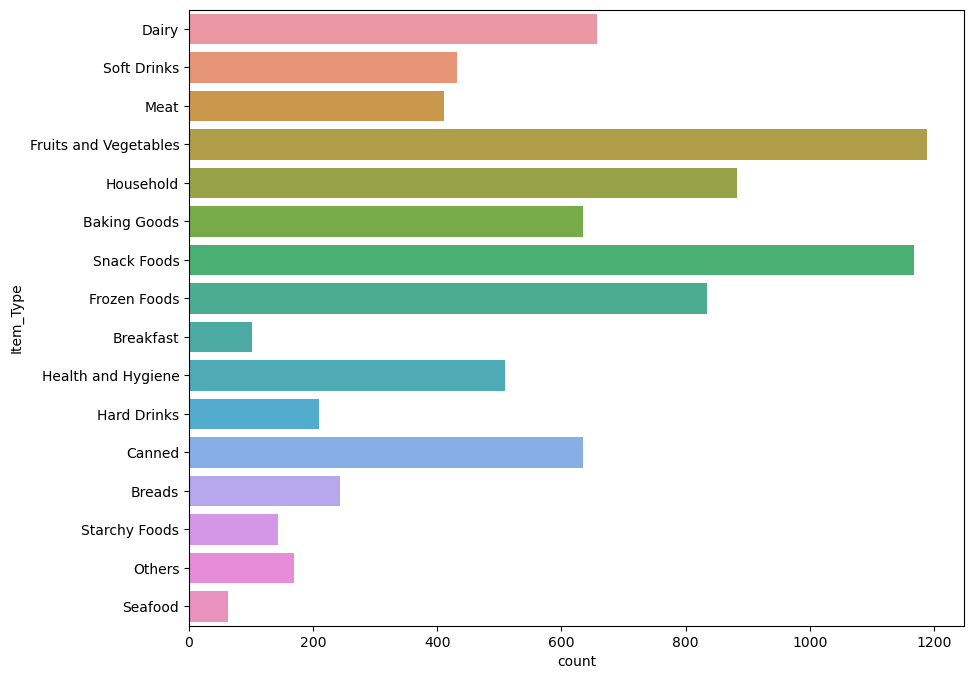

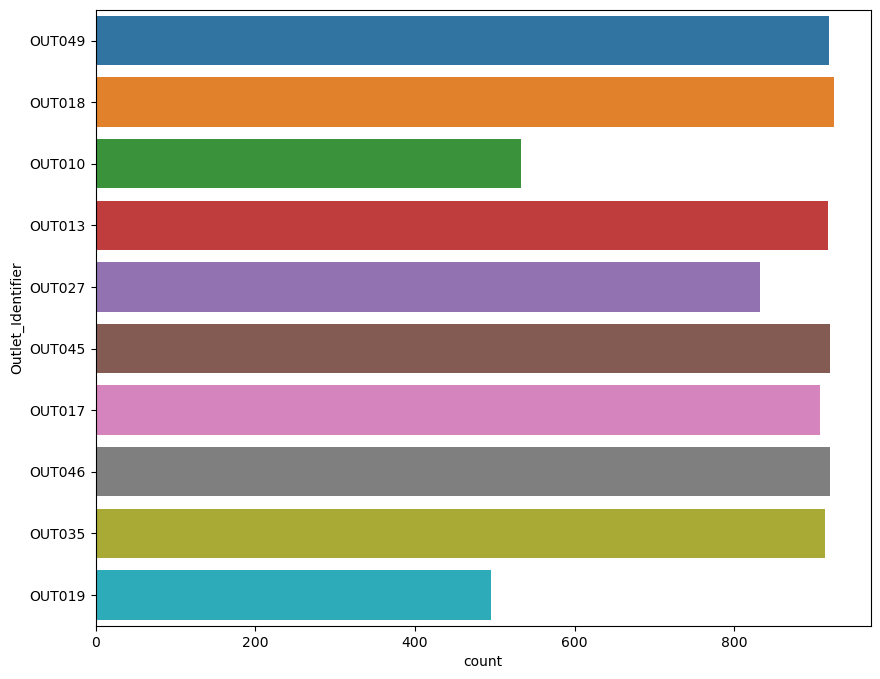

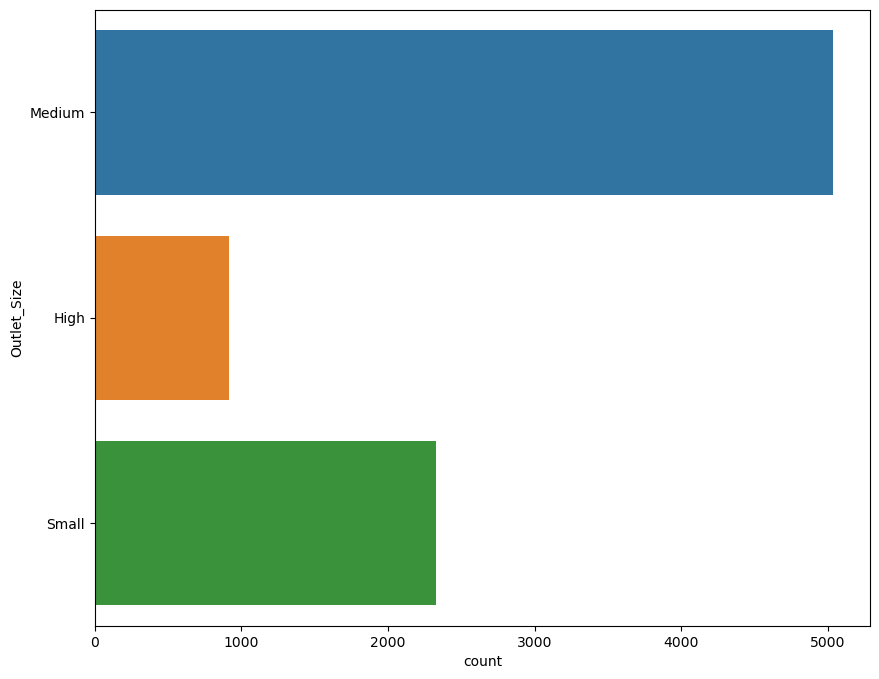

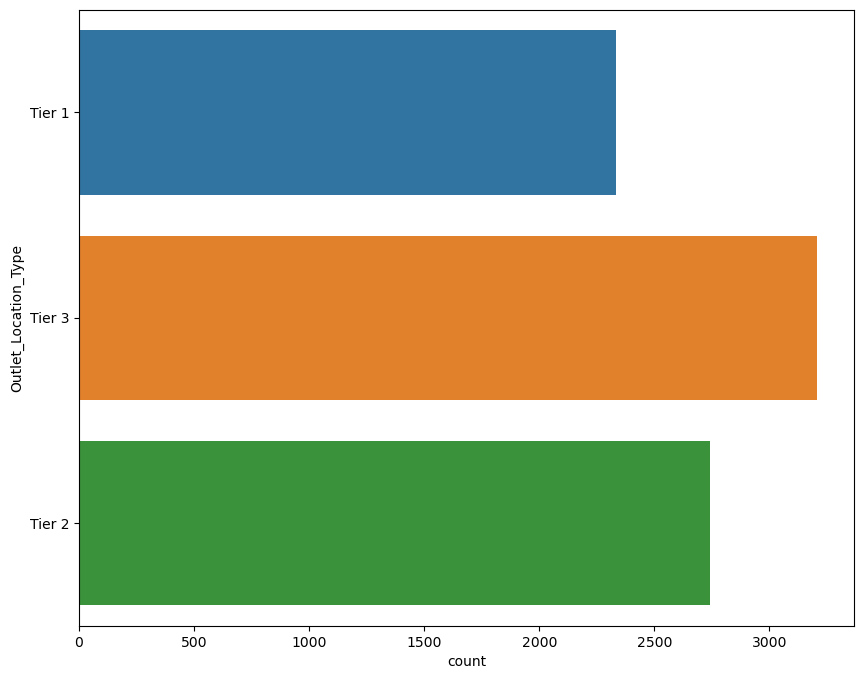

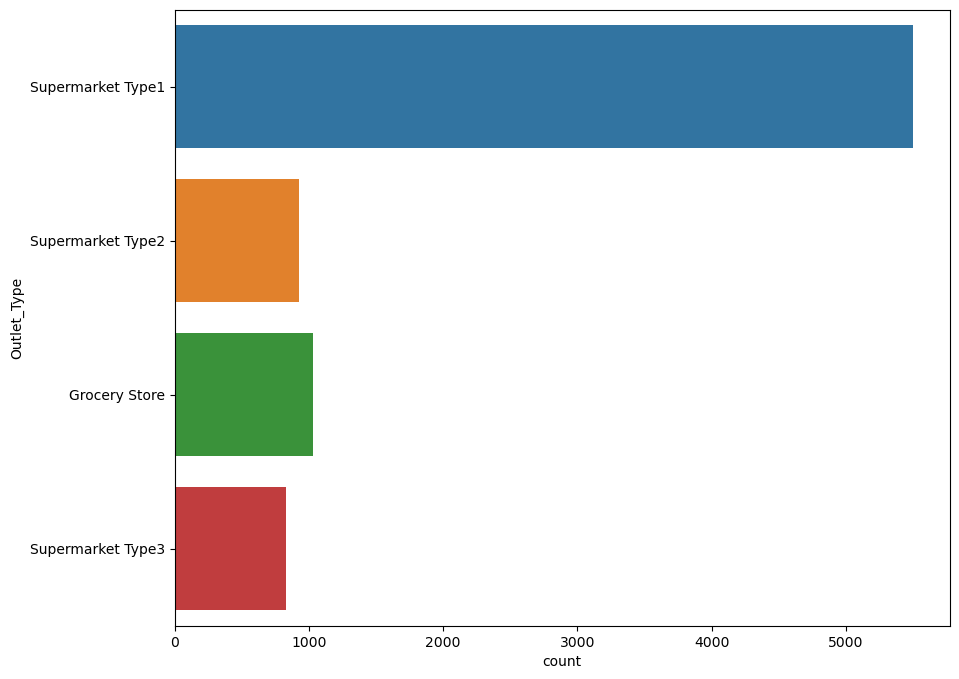

In [54]:
for i in categorical_df:
    plt.figure(figsize = (10,8))
    sns.countplot( y = i, data = bi_df);   

Observations:

Item Identifier: There are lot of individual Item Identifiers.
Item_Fat_Content: We have multiple same values, let's fix it.
Fruits & Vegies, Frozen food, Dariy, Household and Snacks has highest number of counts.
Supermarket has higher number of counts.



First let's fix, Item_Fat_Content



In [55]:
bi_df['Item_Fat_Content'].unique()


array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [56]:
bi_df['Item_Fat_Content'] = bi_df['Item_Fat_Content'].map({"low fat": "Low Fat",
                                                           "Low Fat": "Low Fat",
                                                         "LF":"Low Fat",
                                                         "Regular":"Regular",
                                                         "reg":"Regular"})

In [57]:
bi_df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5359
Regular    2923
Name: count, dtype: int64

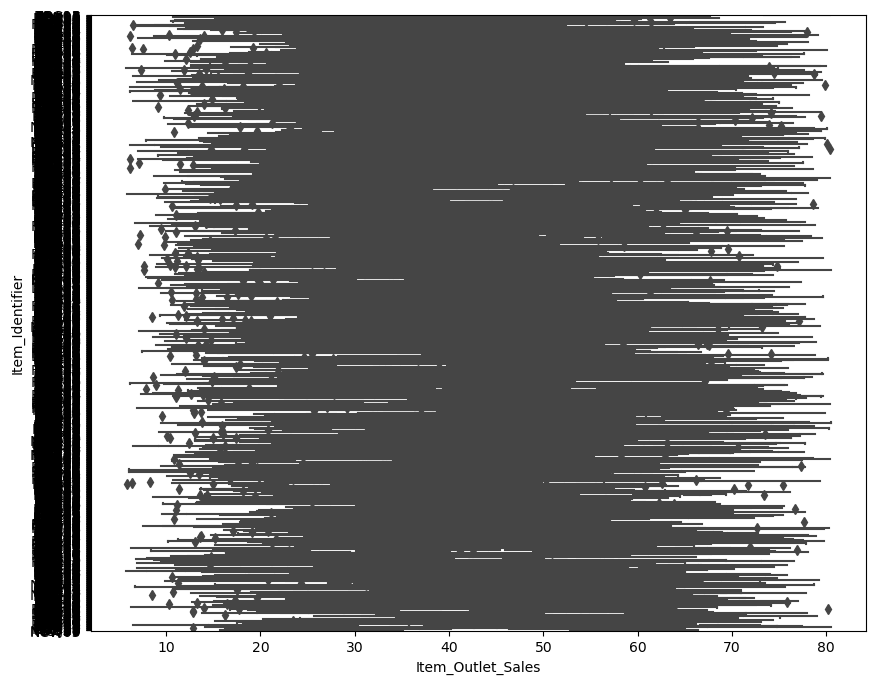

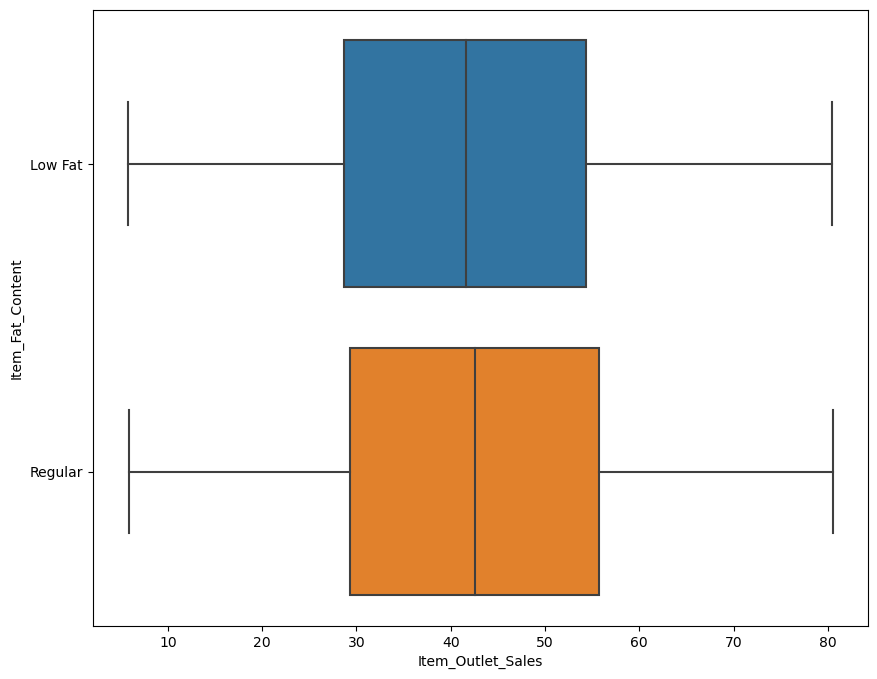

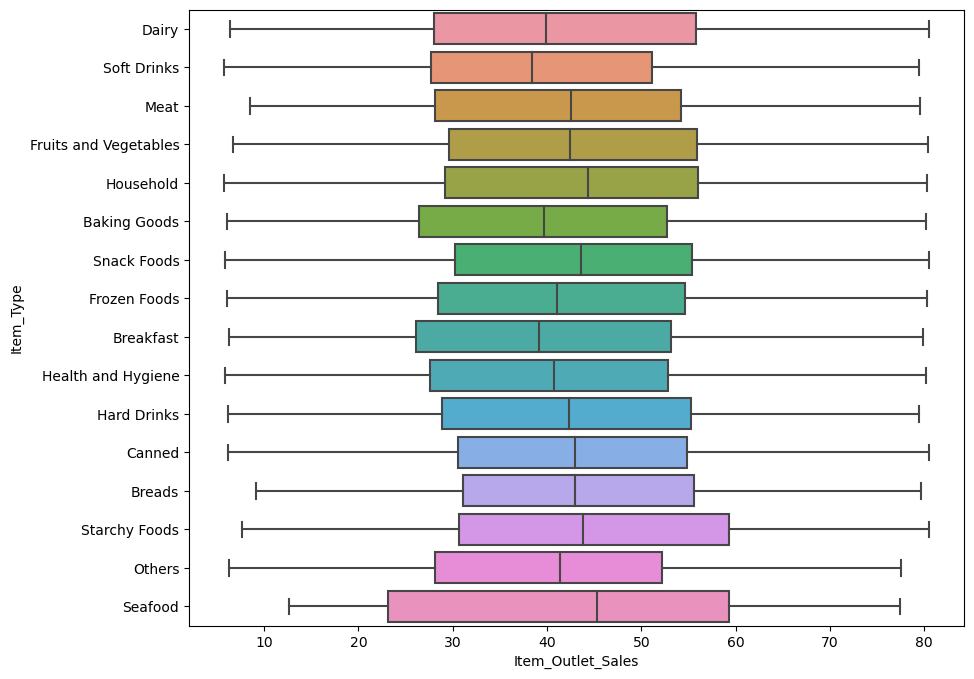

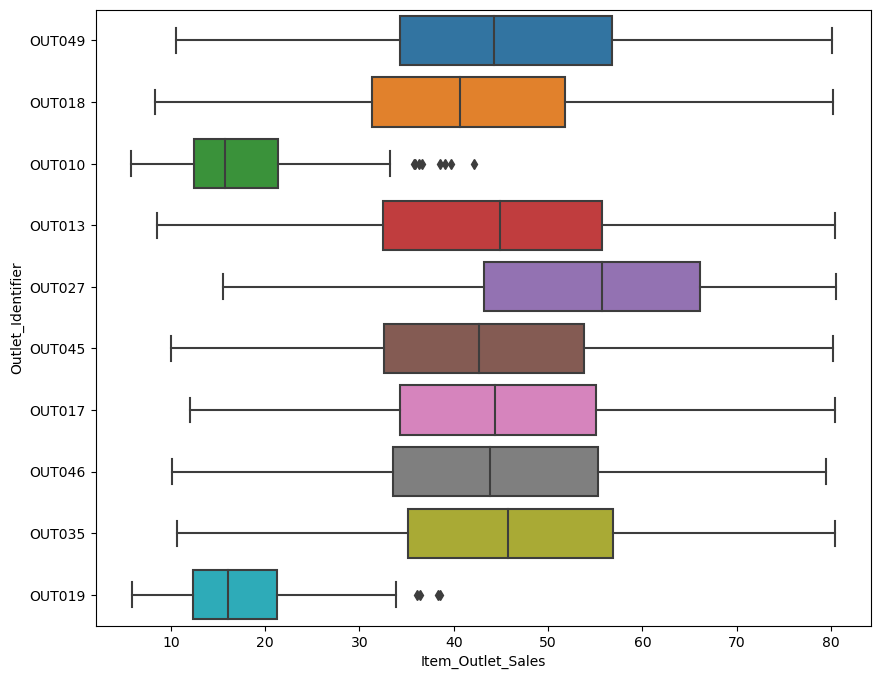

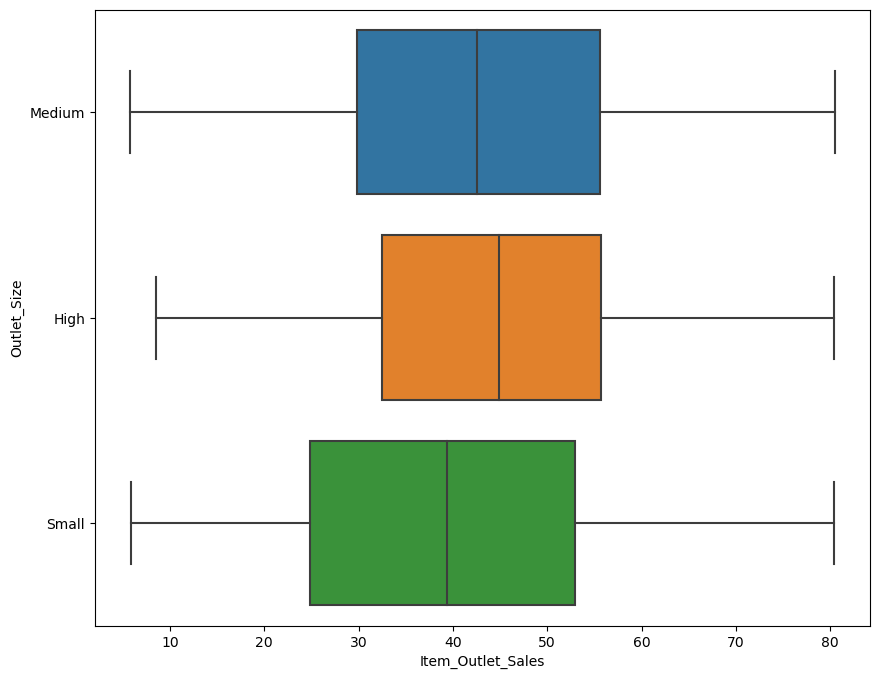

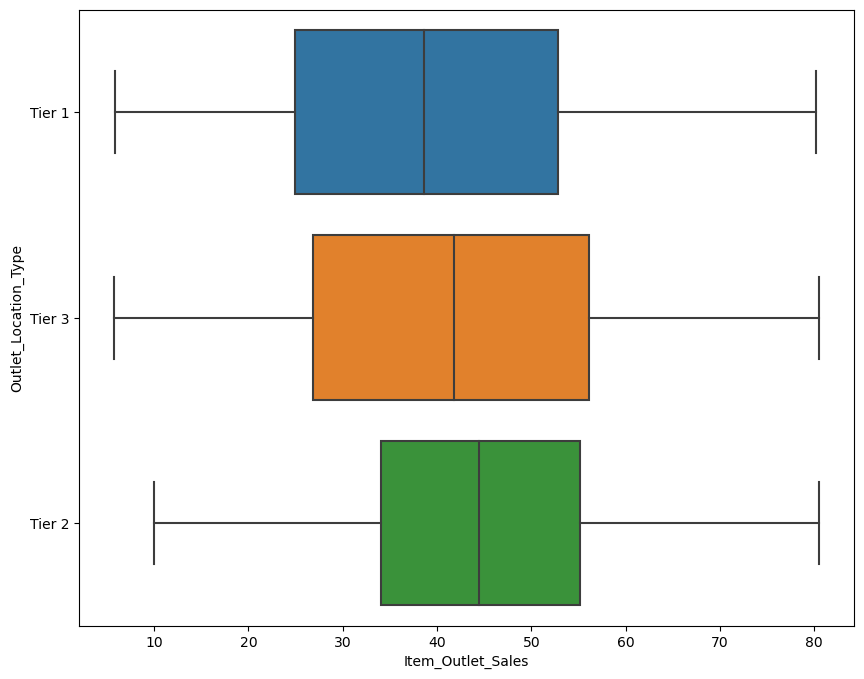

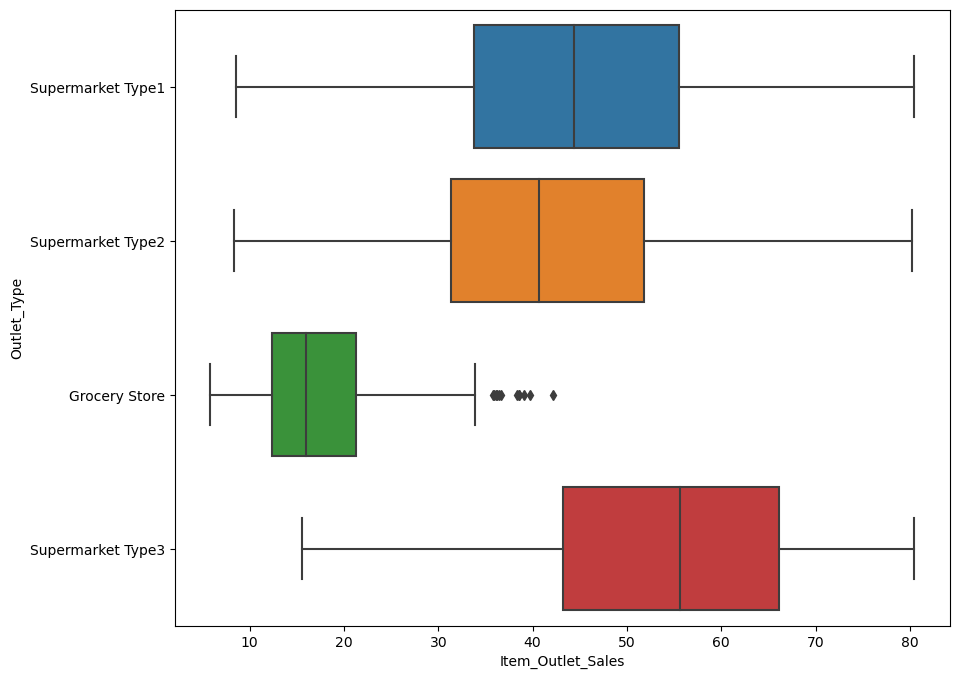

In [58]:
for i in categorical_df:
    plt.figure(figsize = (10,8))
    sns.boxplot( y = i, x = bi_df['Item_Outlet_Sales'],data = bi_df);


Observations:

In terms of 'Outlet_Type', Supermarket has highest demand (Type1 and Type3)
Starchy Food, Dairy, Fruits & Vegetables and Households has highest sales. But most of them all equal in terms of overall sales.

Skewness on Numbers¶


In [59]:
for i in numerical_df:
    print("\n")
    print(i)
    print("-" * 20)
    print("Skewness: %f" % bi_df[i].skew())
    print("Kurtosis: %f" % bi_df[i].kurt())
    print("-" * 20)




Item_Weight
--------------------
Skewness: 0.117195
Kurtosis: -0.889020
--------------------


Item_Visibility
--------------------
Skewness: 0.329221
Kurtosis: -0.513008
--------------------


Item_MRP
--------------------
Skewness: 0.150389
Kurtosis: -0.855955
--------------------


Outlet_Establishment_Year
--------------------
Skewness: -0.427368
Kurtosis: -1.154903
--------------------


Item_Outlet_Sales
--------------------
Skewness: 0.055352
Kurtosis: -0.767968
--------------------


In [60]:
tf_df = bi_df.copy()

Dataset Transformation

categorical_df.columns


In [63]:
categorical_df.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

## Label Encoding

Let's encode all the categorical values, and check the correlation of all the values with 'SalePrice'




In [64]:
from sklearn import preprocessing

In [65]:
label_encoder = preprocessing.LabelEncoder()

In [66]:
categorical_df = tf_df.select_dtypes(include = 'object')


In [67]:
label_df = tf_df.copy()
for i in categorical_df:
    label_df[i] = label_encoder.fit_transform(tf_df[i])

## Correlation


<Axes: >

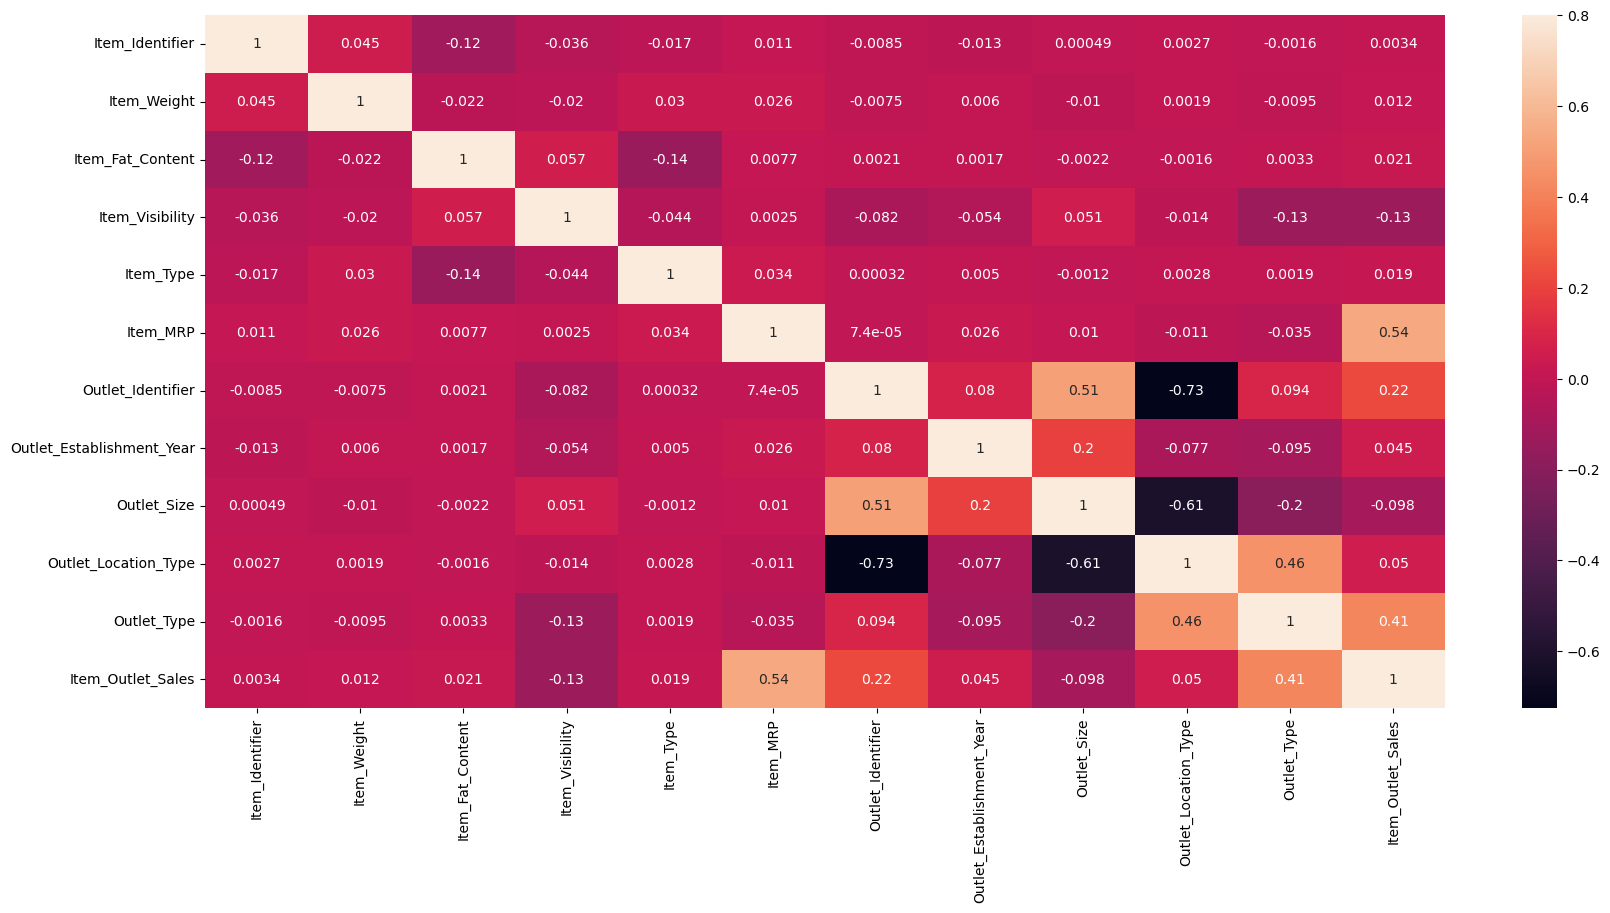

In [68]:
corrmat =label_df.corr()
f, ax = plt.subplots(figsize = (20,9))
sns.heatmap(corrmat, vmax = .8, annot = True)

## Dropping unrelated Columns¶


In [69]:
drop_columns = ['Item_Visibility','Outlet_Size','Outlet_Establishment_Year','Outlet_Type','Item_Weight','Item_Identifier']

tf_df.drop(drop_columns, axis =1 , inplace = True) 


In [70]:
tf_df


,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Item_Outlet_Sales
0,Low Fat,Dairy,249.8092,OUT049,Tier 1,61.115775
1,Regular,Soft Drinks,48.2692,OUT018,Tier 3,21.057607
2,Low Fat,Meat,141.6180,OUT049,Tier 1,45.795961
3,Regular,Fruits and Vegetables,182.0950,OUT010,Tier 3,27.062520
4,Low Fat,Household,53.8614,OUT013,Tier 3,31.538947
...,...,...,...,...,...,...
8518,Low Fat,Snack Foods,214.5218,OUT013,Tier 3,52.710373
8519,Regular,Baking Goods,108.1570,OUT045,Tier 2,23.436830
8520,Low Fat,Health and Hygiene,85.1224,OUT035,Tier 2,34.541477
8521,Regular,Snack Foods,103.1332,OUT018,Tier 3,42.960419


In [71]:
tf_df = pd.get_dummies(tf_df)

In [72]:
tf_df

,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,249.8092,61.115775,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,True,False,False
1,48.2692,21.057607,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,141.6180,45.795961,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
3,182.0950,27.062520,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,53.8614,31.538947,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,214.5218,52.710373,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
8519,108.1570,23.436830,False,True,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
8520,85.1224,34.541477,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
8521,103.1332,42.960419,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True


Preparing the Dataset


In [73]:
X = tf_df.drop(['Item_Outlet_Sales'], axis = 1)
y = tf_df['Item_Outlet_Sales']


Scaling the Dataset


In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X1 = scaler.fit_transform(X)
X = pd.DataFrame(data = X1, columns = X.columns)

In [75]:
X.head()

,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,1.796967,0.738537,-0.738537,-0.288165,-0.173861,-0.111667,-0.288165,3.406726,-0.334852,-0.409426,...,-0.354585,-0.252126,-0.334182,-0.352207,-0.353505,-0.353505,2.830542,1.596376,-0.703332,-0.794935
1,-1.476382,-1.354027,1.354027,-0.288165,-0.173861,-0.111667,-0.288165,-0.293537,-0.334852,-0.409426,...,2.820197,-0.252126,-0.334182,-0.352207,-0.353505,-0.353505,-0.353289,-0.626419,-0.703332,1.257965
2,0.039760,0.738537,-0.738537,-0.288165,-0.173861,-0.111667,-0.288165,-0.293537,-0.334852,-0.409426,...,-0.354585,-0.252126,-0.334182,-0.352207,-0.353505,-0.353505,2.830542,1.596376,-0.703332,-0.794935
3,0.697175,-1.354027,1.354027,-0.288165,-0.173861,-0.111667,-0.288165,-0.293537,-0.334852,2.442441,...,-0.354585,-0.252126,-0.334182,-0.352207,-0.353505,-0.353505,-0.353289,-0.626419,-0.703332,1.257965
4,-1.385555,0.738537,-0.738537,-0.288165,-0.173861,-0.111667,-0.288165,-0.293537,-0.334852,-0.409426,...,-0.354585,-0.252126,-0.334182,-0.352207,-0.353505,-0.353505,-0.353289,-0.626419,-0.703332,1.257965


Splitting Dataset¶


In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((6625, 32), (1657, 32), (6625,), (1657,))

## Modeling and Evaluation Metrics¶


Linear Regression


In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math


lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [79]:
lr_predict = lr.predict(X_test)

In [80]:
yp = lr.predict(X_test)
print("R2 Score:", r2_score(y_test, lr_predict))
print("Mean Squarred Error:", mean_squared_error(y_test, lr_predict))
print("RMSE:", math.sqrt(mean_squared_error(y_test, lr_predict)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,lr_predict)))

R2 Score: 0.6258863862255339
Mean Squarred Error: 109.08056907605167
RMSE: 10.44416435508613
Mean Absolute Error : 8.21981934450428
